<a href="https://colab.research.google.com/github/rahmatfaisal/dump_project/blob/master/Yolo_Darknet_Video_Without_Display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run YOLO V3 on Colab for images/videos
<br>


In [1]:
# We will be using a forked version of Darknet which 
# allows us to suppress the display from OpenCV, when running
# object detection on videos
!ls
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 12412 (delta 7), reused 13 (delta 5), pack-reused 12394
Receiving objects: 100% (12412/12412), 11.50 MiB | 12.35 MiB/s, done.
Resolving deltas: 100% (8431/8431), done.


In [2]:
!ls
%cd darknet
!ls
% cd ..

darknet  sample_data
/content/darknet
3rdparty      cmake		      image_yolov2.sh	     net_cam_v3.sh
appveyor.yml  CMakeLists.txt	      image_yolov3.sh	     README.md
build	      DarknetConfig.cmake.in  include		     scripts
build.ps1     darknet.py	      json_mjpeg_streams.sh  src
build.sh      darknet_video.py	      LICENSE		     video_v2.sh
cfg	      data		      Makefile		     video_yolov3.sh
/content


In [3]:
#Installing CUDA pre-requisites
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

--2020-01-28 17:16:33--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.182.215
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.182.215|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?bijP8nw73jXGXb5sC0aYYbZdGUarADQC_iy49vosJM2Vlb0ScFhadMcdRUm7pahINqWFOuwfQfyHfy5_-MHvhzkoiOqm-xzF0iMfBNptBjPkQbOOBlQNFWWuJlJymUHkEpOfyeeIwgFminusBWmmGrt-Xi2c2PMFQOC_tiVKPHdP8L3oHHR3KOZ_sEHa-4ooPSsHBLXpT-TYhZW_03zaM7lAUw [following]
--2020-01-28 17:16:34--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?bijP8nw73jXGXb5sC0aYYbZdGUarADQC_iy49vosJM2Vlb0ScFhadMcdRUm7pahINqWFOuwfQfyHfy5_-MHvhzkoiOqm

In [4]:
!apt update

Get:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Ign:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:6 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:11 file:/var/cuda-repo-8-0-local-ga2  Packages [22.7 kB]
Get:12 https://cloud.r-project.org/bin/linux/ubuntu bioni

In [5]:
#Installing CUDA
!apt install cuda-8-0 -y

# If there is an issue installing CUDA, 
# try installing cuda-visual-tools again
# Comment the earlier command to install cuda
# Uncomment and run the below command

#!apt --fix-broken install cuda-visual-tools-8-0 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cuda-command-line-tools-8-0 cuda-core-8-0 cuda-cublas-8-0
  cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0 cuda-cufft-8-0
  cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0 cuda-cusolver-8-0
  cuda-cusolver-dev-8-0 cuda-cusparse-8-0 cuda-cusparse-dev-8-0
  cuda-demo-suite-8-0 cuda-documentation-8-0 cuda-driver-dev-8-0
  cuda-license-8-0 cuda-misc-headers-8-0 cuda-npp-8-0 cuda-npp-dev-8-0
  cuda-nvgraph-8-0 cuda-nvgraph-dev-8-0 cuda-nvml-dev-8-0 cuda-nvrtc-8-0
  cuda-nvrtc-dev-8-0 cuda-runtime-8-0 cuda-samples-8-0 cuda-toolkit-8-0
  cuda-visual-tools-8-0
The following NEW packages will be installed:
  cuda-8-0 cuda-command-line-tools-8-0 cuda-core-8-0 cuda-cublas-8-0
  cuda-cublas-dev-8-0 cu

In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [7]:
#Installing compilers
!apt install gcc-5 g++-5 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 77 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 

In [0]:
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [10]:
#Changing the variables to include OpenCV and GPU in the Makefile
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
#!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile

/content/darknet


In [11]:
# And this is how our Makefile looks now
# Check if OPENCV = 1 and GPU = 1
!cat Makefile

GPU=1
CUDNN=0
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)

USE_CPP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	  -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# GeForce RTX 2080 Ti, RTX 2080, RTX 2070, Quadro RTX 8000, Quadro RTX 6000, Quadro RTX 5000, Tesla T4, XNOR Tensor Cores
# ARCH= -gencode arch=compute_75,code=[sm_75,compute_75]

# Jetson XAVIER
# ARCH= -gencode arch=compute_72,code=[sm_72,compute_72]

# GTX 1080, GTX 1070, GTX 1060, GTX 1050, GTX 1030, Titan Xp, Tesla

In [12]:
# Apparently we need to install this so that OpenCV can work without any issues
# when we are making the file
!apt-get install libopencv-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 77 not upgraded.


In [13]:
#Running make!
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:909:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^
./src/image_opencv.cpp: At global scope:
./src/image_opencv.cpp:427:14: warning: ‘float get_pixel(image, int, int, int)’ defined but not used [-Wunused-function]
 static float get_pixel(image m, int x, int y, int c)
              ^
g++ -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-un

In [14]:
# Downloading YOLO weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-01-28 17:21:15--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  20.1MB/s    in 13s     

2020-01-28 17:21:28 (18.7 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [15]:
# Let's see if it can detect object without any issues.
# Here is an example from YOLO
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

 CUDA-version: 8000 (10010)
, GPU count: 1  
 OpenCV version: 3.2.0
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv 

In [16]:
!ls

3rdparty      CMakeLists.txt	      include		     results
appveyor.yml  darknet		      json_mjpeg_streams.sh  scripts
backup	      DarknetConfig.cmake.in  LICENSE		     src
build	      darknet.py	      Makefile		     video_v2.sh
build.ps1     darknet_video.py	      net_cam_v3.sh	     video_yolov3.sh
build.sh      data		      obj		     yolov3.weights
cfg	      image_yolov2.sh	      predictions.jpg
cmake	      image_yolov3.sh	      README.md


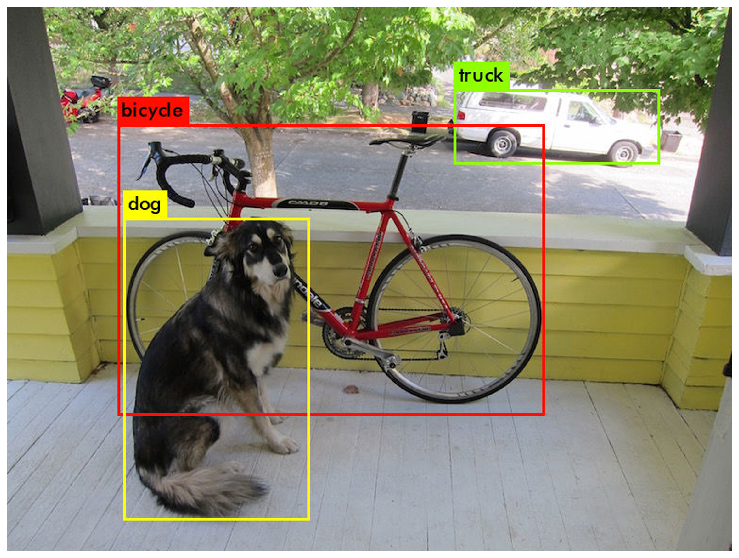

In [17]:
#The DOG, The TRUCK and The Bicycle!
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("predictions.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()




In [20]:
# Upload the video you want to use for object detection
# Please use a filename without spaces like test.mp4 etc.
%cd 
%cd darknet
!ls
%cd data
from google.colab import files
uploaded = files.upload() 
for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)


/root
[Errno 2] No such file or directory: 'darknet'
/root
[Errno 2] No such file or directory: 'data'
/root


MessageError: ignored

In [28]:
# And finally run it! Please check if you have given the right video file name
%cd 
%cd /content/darknet
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show /content/videoplayback.mp4 -i 0 -out_filename res.avi

 

/root
/content/darknet
 CUDA-version: 8000 (10010)
, GPU count: 1  
 OpenCV version: 3.2.0
Demo
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 1

In [29]:
# Download the resulting video and use VLC to run it
!ls -all
files.download('res.avi')


total 248848
drwxr-xr-x 16 root root      4096 Jan 28 17:31 .
drwxr-xr-x  1 root root      4096 Jan 28 17:24 ..
drwxr-xr-x  4 root root      4096 Jan 28 17:16 3rdparty
-rw-r--r--  1 root root      6019 Jan 28 17:16 appveyor.yml
drwxr-xr-x  2 root root      4096 Jan 28 17:20 backup
drwxr-xr-x  3 root root      4096 Jan 28 17:16 build
-rwxr-xr-x  1 root root      8265 Jan 28 17:16 build.ps1
-rwxr-xr-x  1 root root      2044 Jan 28 17:16 build.sh
drwxr-xr-x  3 root root      4096 Jan 28 17:16 cfg
drwxr-xr-x  2 root root      4096 Jan 28 17:16 .circleci
drwxr-xr-x  3 root root      4096 Jan 28 17:16 cmake
-rw-r--r--  1 root root     20019 Jan 28 17:16 CMakeLists.txt
-rwxr-xr-x  1 root root   4438944 Jan 28 17:21 darknet
-rw-r--r--  1 root root      1363 Jan 28 17:16 DarknetConfig.cmake.in
-rw-r--r--  1 root root     16619 Jan 28 17:16 darknet.py
-rw-r--r--  1 root root      4010 Jan 28 17:16 darknet_video.py
drwxr-xr-x  3 root root      4096 Jan 28 17:16 data
drwxr-xr-x  8 root root      4

MessageError: ignored